**Business Problem**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the American market.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
import datetime as dt
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_csv('Yulu.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
#Checking Nulls
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
#Checking duplicates
df.duplicated().sum()

0

In [7]:
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

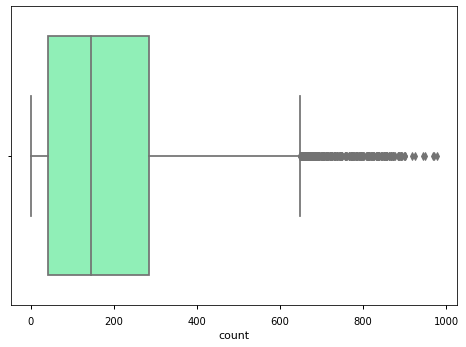

In [8]:
#Checking outliers
sns.boxplot(df['count'],palette='rainbow')

In [9]:
#Removing outliers
q96=df['count'].quantile(0.965)
df=df[df['count']<q96]
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12


C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

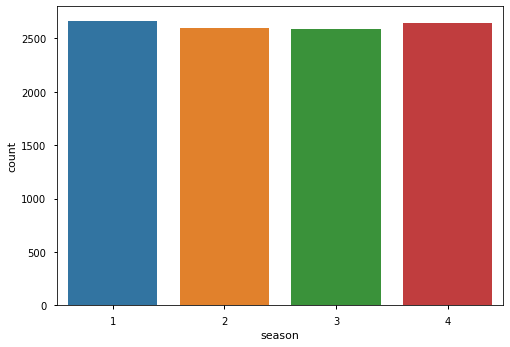

In [10]:
sns.countplot(df['season'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

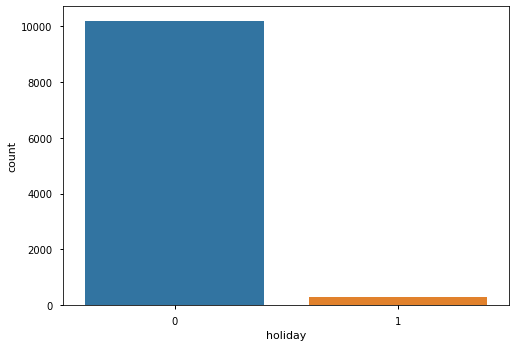

In [11]:
sns.countplot(df['holiday'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

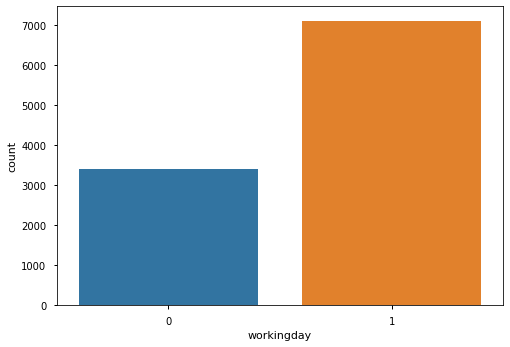

In [12]:
sns.countplot(df['workingday'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

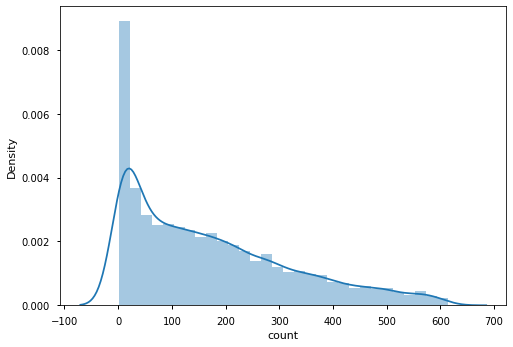

In [13]:
sns.distplot(df['count'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

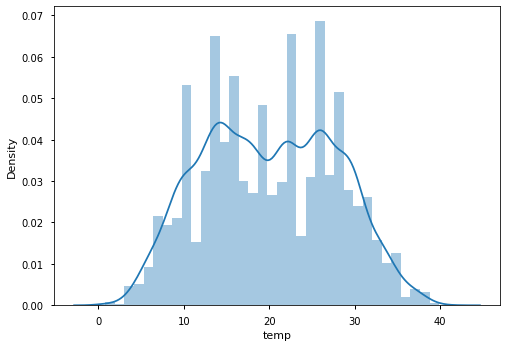

In [14]:
sns.distplot(df['temp'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='humidity', ylabel='Density'>

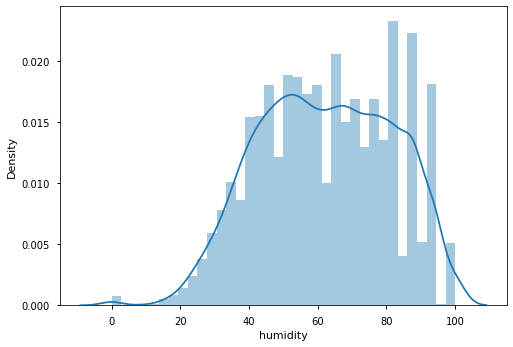

In [15]:
sns.distplot(df['humidity'])

In [16]:
df1=df[['count','casual','registered','workingday','weather','season']]

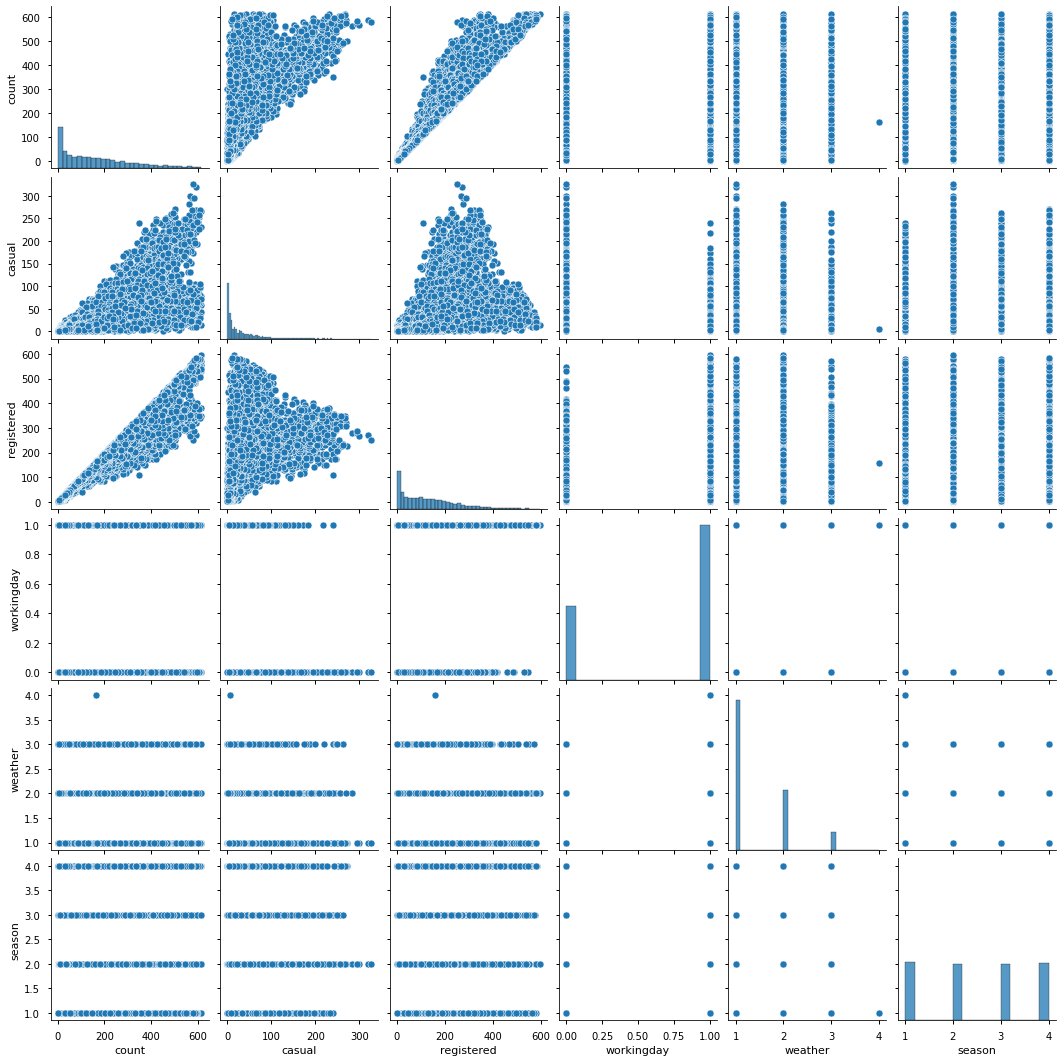

In [17]:
sns.pairplot(df1)

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

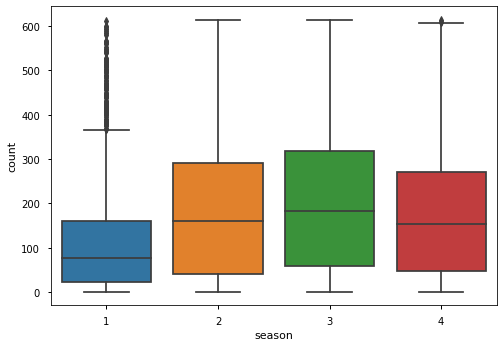

In [18]:
sns.boxplot(df['season'],df['count'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

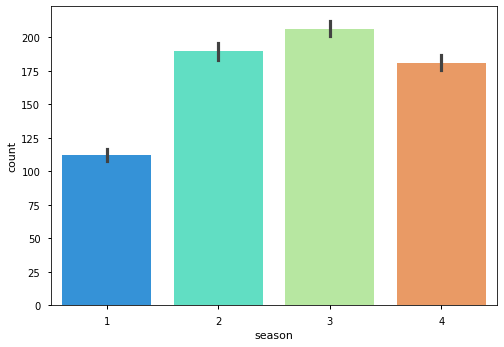

In [19]:
sns.barplot(df['season'],df['count'],palette='rainbow')

In [20]:
df['count'].groupby(df['season']).sum()

season
1    299896
2    492448
3    535425
4    479339
Name: count, dtype: int64

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

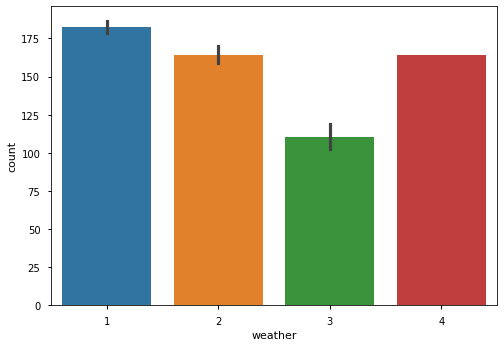

In [21]:
sns.barplot(df['weather'],df['count'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

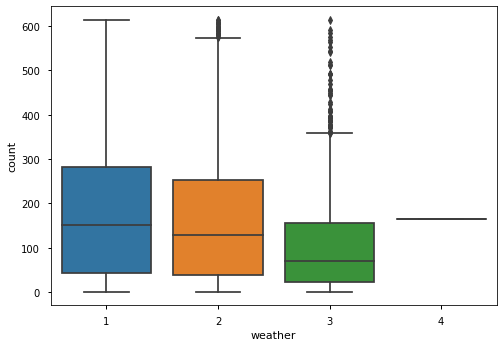

In [22]:
sns.boxplot(df['weather'],df['count'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

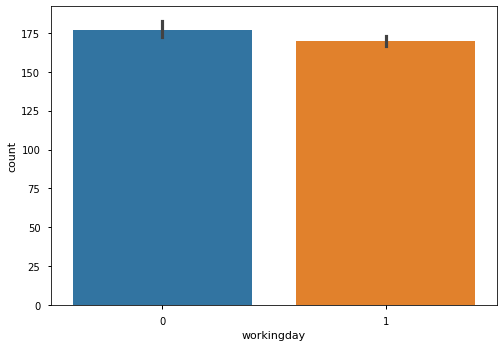

In [23]:
sns.barplot(df['workingday'],df['count'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

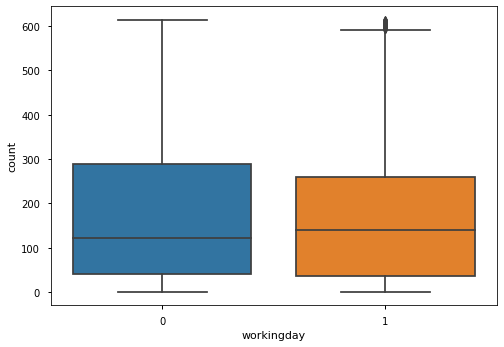

In [24]:
sns.boxplot(df['workingday'],df['count'])

In [25]:
df['count'].groupby(df['workingday']).sum()

workingday
0     600396
1    1206712
Name: count, dtype: int64

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

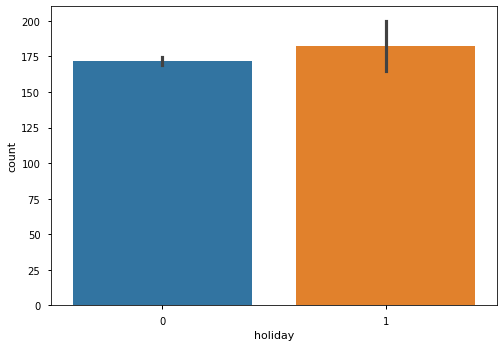

In [26]:
sns.barplot(df['holiday'],df['count'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

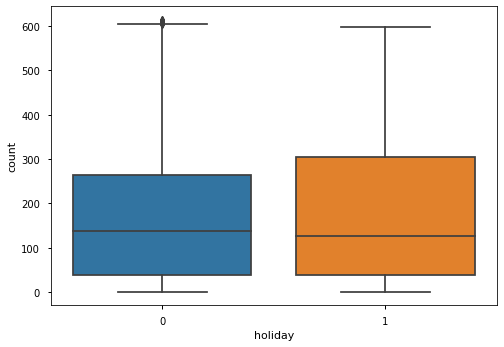

In [27]:
sns.boxplot(df['holiday'],df['count'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp', ylabel='count'>

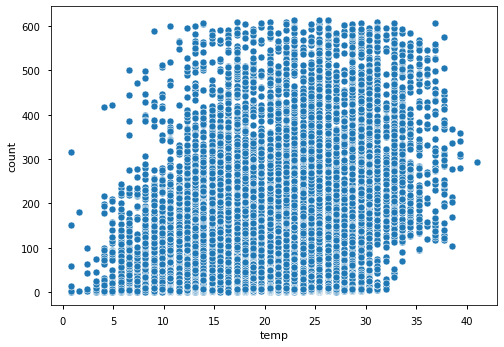

In [28]:
sns.scatterplot(df['temp'],df['count'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='humidity', ylabel='count'>

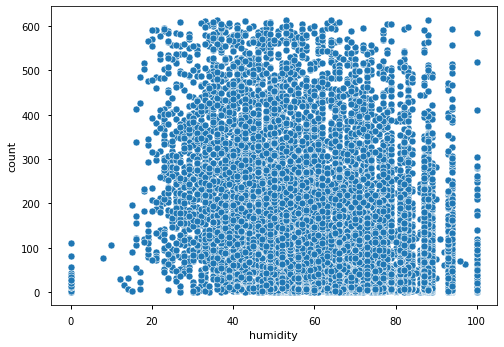

In [29]:
sns.scatterplot(df['humidity'],df['count'])

<AxesSubplot:xlabel='humidity', ylabel='temp'>

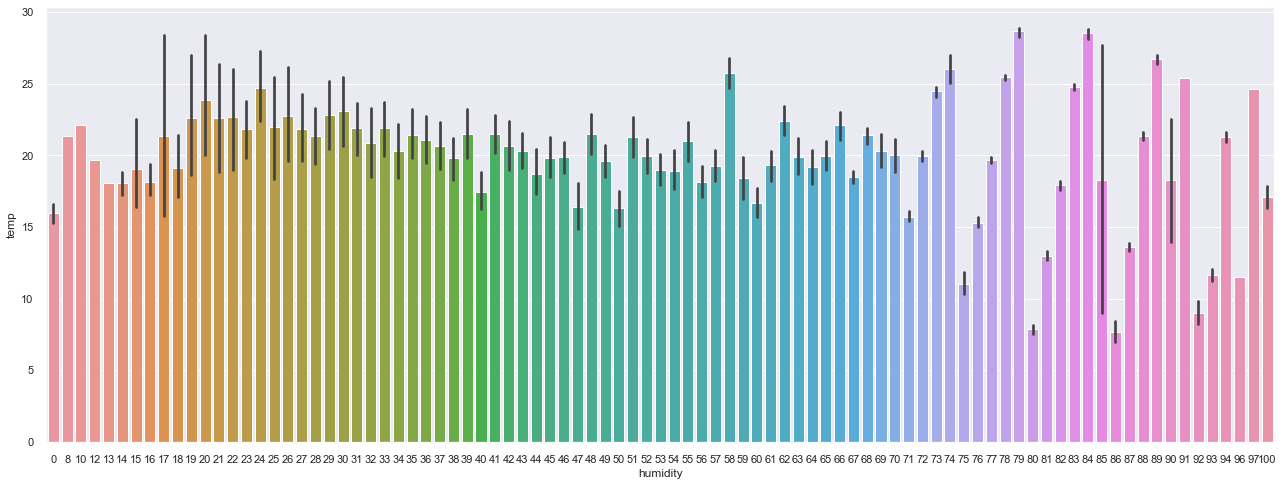

In [30]:
sns.set(rc = {'figure.figsize':(22,8)})
sns.barplot(x='humidity',y='temp',data=df)

<AxesSubplot:xlabel='month', ylabel='count'>

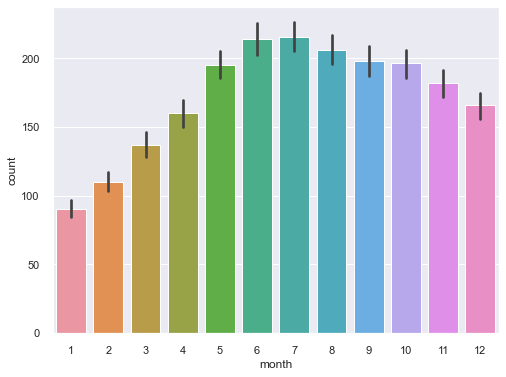

In [31]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(x='month',y='count',data=df)

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

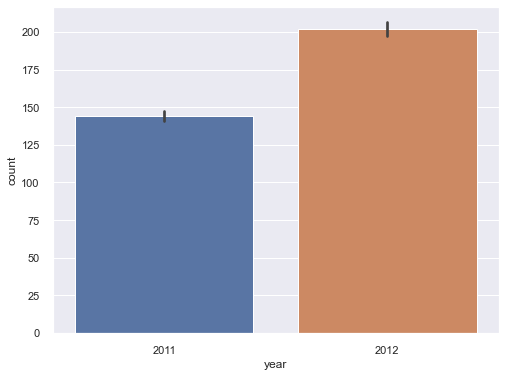

In [32]:

sns.barplot(df['year'],df['count'])

In [33]:
df['count'].groupby(df['year']).sum()

year
2011     779468
2012    1027640
Name: count, dtype: int64

In [34]:
(1027640-779468)/779468

0.3183863866124074

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='registered'>

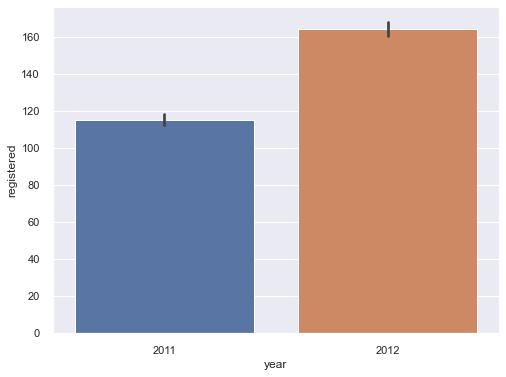

In [35]:
sns.barplot(df['year'],df['registered'])

In [36]:
df['registered'].groupby(df['year']).sum()

year
2011    623947
2012    835427
Name: registered, dtype: int64

In [37]:
(835427-623947)/623947

0.33893904450217727

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='casual'>

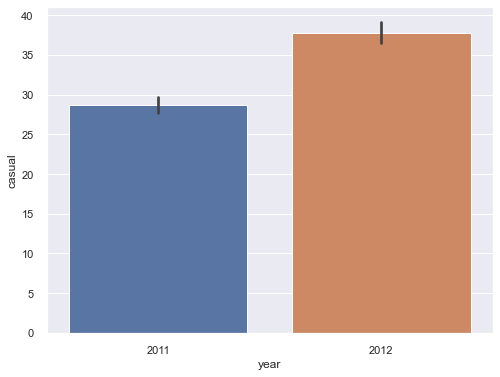

In [38]:
sns.barplot(df['year'],df['casual'])

In [39]:
df['casual'].groupby(df['year']).sum()

year
2011    155521
2012    192213
Name: casual, dtype: int64

In [40]:
(192213-155521)/155521

0.2359295529221134

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='registered'>

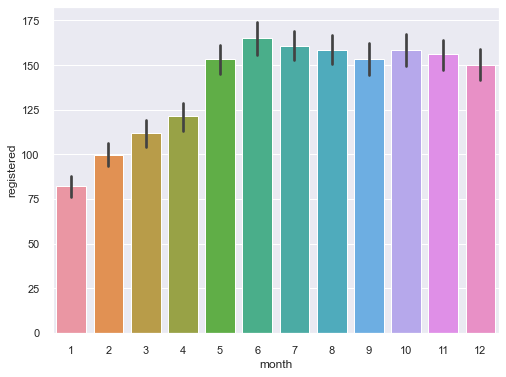

In [41]:
sns.barplot(df['month'],df['registered'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='season'>

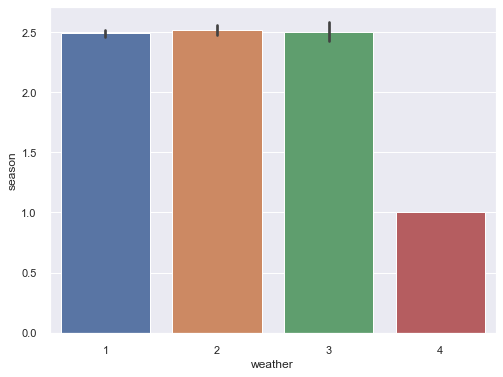

In [42]:
sns.barplot(df['weather'],df['season'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='temp'>

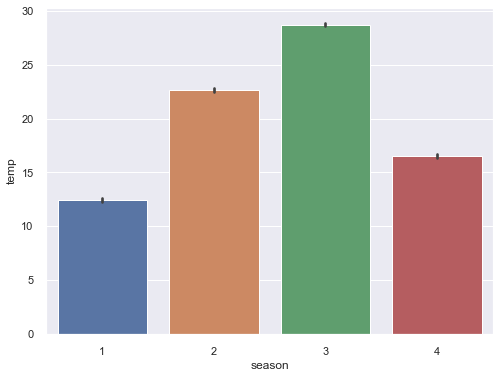

In [43]:
sns.barplot(df['season'],df['temp'])

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='season'>

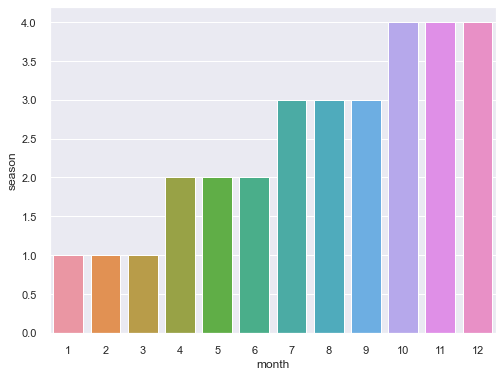

In [44]:
sns.barplot(df['month'],df['season'])

<AxesSubplot:>

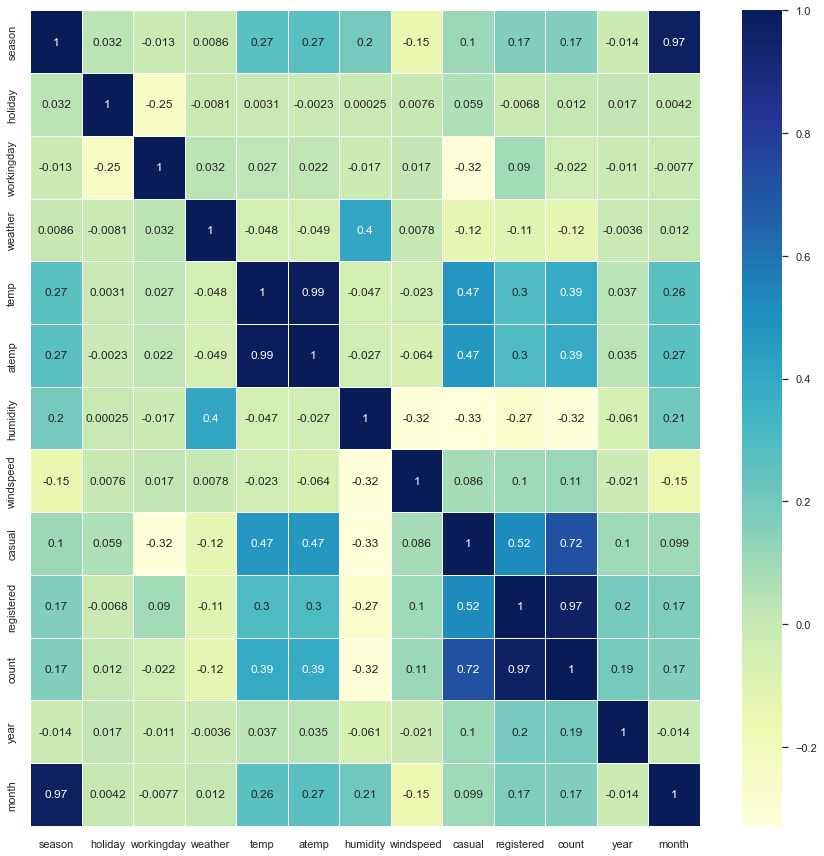

In [45]:
f, ax = plt.subplots(figsize =(15, 15))
sns.heatmap(df.corr(), cmap ="YlGnBu", annot=True,linewidths = 0.5)

<AxesSubplot:xlabel='temp', ylabel='count'>

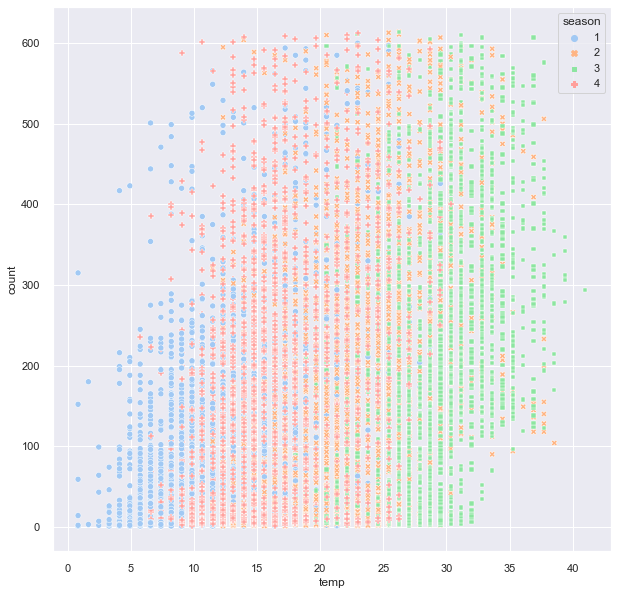

In [46]:
f, ax = plt.subplots(figsize =(10, 10))
sns.scatterplot(x='temp',y='count',data=df,hue='season',style='season',palette='pastel')

<AxesSubplot:xlabel='season', ylabel='count'>

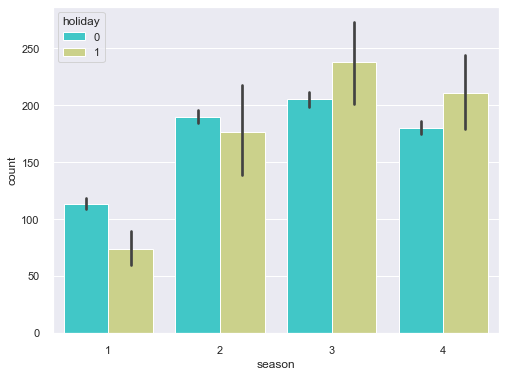

In [47]:
sns.barplot(x = 'season',y = 'count',hue = 'holiday',data = df,palette='rainbow')

# Hypothesis Testing :

### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

#### T-TEST :

A t-test can only be used when comparing the means of two groups (a.k.a. pairwise comparison). If you want to compare more than two groups, or if you want to do multiple pairwise comparisons, use an ANOVA test or a post-hoc test.

The t-test is a parametric test of difference, meaning that it makes the same assumptions about your data as other parametric tests. The t-test assumes your data:

- are independent
- are (approximately) normally distributed.
- have a similar amount of variance within each group being compared (a.k.a. homogeneity of variance)

**Null Hypothesis :** Working Day has no effect on the number of electric cycles rented 

**Alternate Hypothesis :** Working Day has an effect on the number of electric cycles rented 

**Level of Significance:**95%

In [48]:
df['workingday'].value_counts()

1    7110
0    3392
Name: workingday, dtype: int64

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

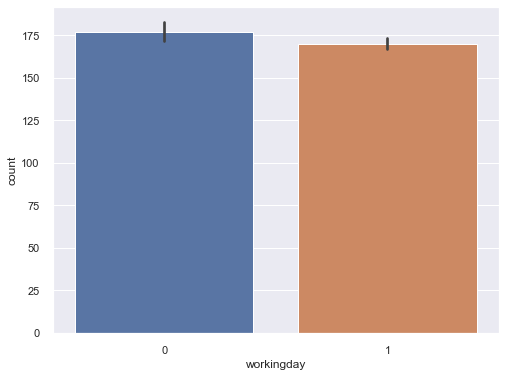

In [49]:
sns.barplot(df['workingday'],df['count'])

In [50]:
df['count'].groupby(df['workingday']).sum()

workingday
0     600396
1    1206712
Name: count, dtype: int64

There is a slight difference in working and non working day ,from the above sum we get to know that there are lot number os cycles rented in working days compared to non working

In [51]:
sample=df

C:\Users\doolla.vennela\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

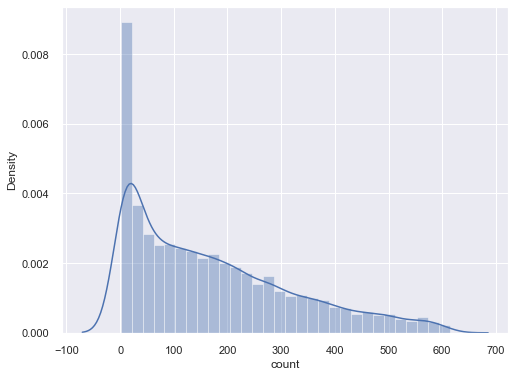

In [52]:
#Checking if count follows normal distribution
sns.distplot(sample['count'])

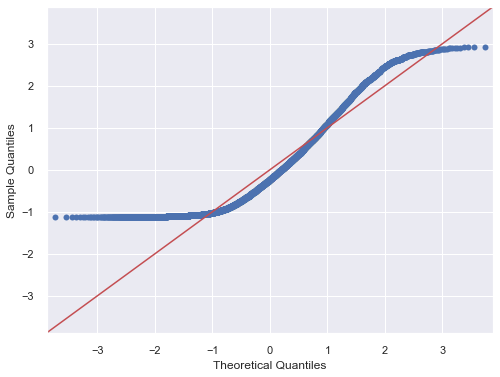

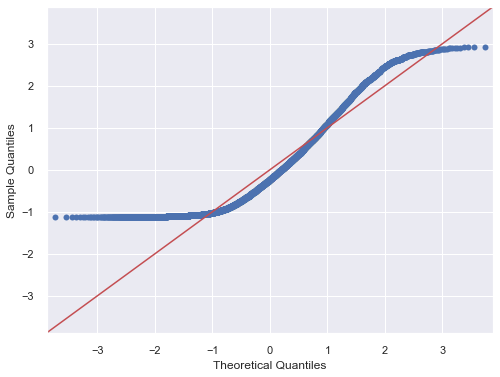

In [53]:
sm.qqplot(sample['count'],line='45',fit=True,dist=stats.norm)

In [54]:
s,p_val=stats.normaltest(sample['count'])
print(p_val)

1.032205261215772e-218


As p_val<<<0.05,from p value we can conclude that the distribution doesnt follow normal distribution

    

In [55]:
#Checking if two groups have a similar amount of variance
sample.groupby('workingday')['count'].var()

workingday
0    25269.838383
1    21858.023371
Name: count, dtype: float64

There is a difference of 3419 of variance among two groups

In [56]:
z=sample[sample['workingday']==0]
o=sample[sample['workingday']==1]

In [57]:
stats.ttest_ind(z['count'],o['count'],alternative='two-sided')

Ttest_indResult(statistic=2.3033547323374934, pvalue=0.021278335589032152)

T Critical value from Table is 1.962

#### As T_Stat > Tcritcal and pvalue < 0.05, We reject Null Hypothesis and go with Alternative Hypothesis(Working Day has an effect on the number of electric cycles rented )

### ANNOVA to check if No. of cycles rented is similar or different in different weather and season 

#### ANNOVA :

ANOVA, which stands for Analysis of Variance, is a statistical test used to analyze the difference between the means of more than two groups.

we use a one-way ANOVA when you have collected data about one categorical independent variable and one quantitative dependent variable. The independent variable should have at least three levels

**Assumptions:**

The results of a one-way ANOVA can be considered reliable as long as the following assumptions are met:

1. Response variable residuals are normally distributed (or approximately normally distributed).
2. Variances of populations are equal.
3. Responses for a given group are independent and identically distributed normal random variables (not a simple random sample (SRS)).

### ANOVA FOR SEASONS

**Null Hypothesis :** No. of cycles rented is similar in different seasons

**Alternate Hypothesis :** No. of cycles rented is not similar in different seasons

**Level of Significance:**95%

**Normality Test:**From the above example we have come to know that count doesnt follow normal distribution

<AxesSubplot:title={'center':'count'}, xlabel='season'>

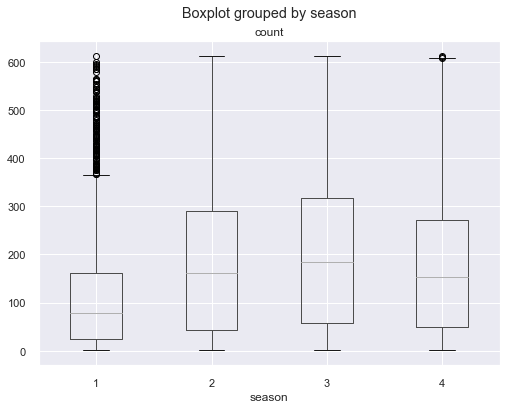

In [58]:
df.boxplot('count',by='season')

from the above diagram we get to know cycles rented are not same acroass all the seasons

In [59]:
#Checking if all groups have a similar amount of variance
df.groupby('season')['count'].var()

season
1    13468.771960
2    25332.027996
3    25490.832078
4    22642.271030
Name: count, dtype: float64

From the above result we get to know that the variances are not equal among the groups

In [60]:
import pingouin as pg

aov = pg.anova(data=df, dv='count', between='season', detailed=True)
print(aov)

   Source            SS     DF            MS           F          p-unc  \
0  season  1.360445e+07      3  4.534817e+06  209.171071  8.775683e-132   
1  Within  2.275961e+08  10498  2.167995e+04         NaN            NaN   

        np2  
0  0.056403  
1       NaN  


**F-critcal value from table is 2.6**

#### As F_Stat>> > Fcritcal and pvalue <<< 0.05, We reject Null Hypothesis and go with Alternative Hypothesis (No. of cycles rented is not similar in different seasons )

### ANOVA FOR WEATHER

**Null Hypothesis :** No. of cycles rented is similar in different Weather

**Alternate Hypothesis :** No. of cycles rented is not similar in different Weather

**Level of Significance:**95%

**Normality Test:**From the above example we have come to know that count doesnt follow normal distribution

<AxesSubplot:title={'center':'count'}, xlabel='weather'>

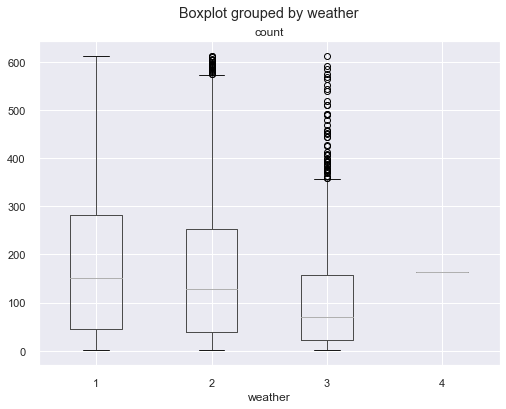

In [61]:
df.boxplot('count',by='weather')

from the above diagram we get to know cycles rented are not same acroass all the weather

In [62]:
df.groupby('weather')['count'].sum()

weather
1    1259945
2     453189
3      93810
4        164
Name: count, dtype: int64

In [63]:
df.groupby('weather')['count'].var()

weather
1    24327.647285
2    20821.613032
3    14080.565230
4             NaN
Name: count, dtype: float64

In [64]:
aov1 = pg.anova(data=df, dv='count', between='weather', detailed=True)
print(aov1)

    Source            SS     DF            MS          F         p-unc  \
0  weather  4.157802e+06      3  1.385934e+06  61.379383  2.481096e-39   
1   Within  2.370427e+08  10498  2.257980e+04        NaN           NaN   

        np2  
0  0.017238  
1       NaN  


**F-critcal value from table is 2.6**

#### As F_Stat>> > Fcritcal and pvalue <<< 0.05, We reject Null Hypothesis and go with Alternative Hypothesis  (No. of cycles rented is not similar in different weather)

### Chi-square test to check if Weather is dependent on the season 

#### Chi-square test

A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data.

**Assumptions:**
1. Both variables are categorical.
2. All observations are independent.
3. Cells in the contingency table are mutually exclusive.
4. Expected value of cells should be 5 or greater in at least 80% of cells.

**Null Hypothesis :** Weather is not dependent on the season

**Alternate Hypothesis :** Weather is dependent on the season

**Level of Significance:**95%

<AxesSubplot:xlabel='weather', ylabel='season'>

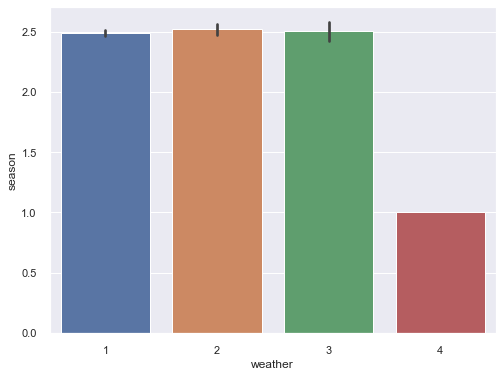

In [66]:

sns.barplot(x ='weather', y ='season', data = df)

From the above graph we cannot tell anything about the relationship between season and weather


*All the Assumptions are satisfied*

In [67]:
ctab=pd.crosstab(df['season'],df['weather'])
ctab

weather,1,2,3,4
season,,,,
1,1743,713,211,1
2,1689,686,222,0
3,1822,576,194,0
4,1640,784,221,0


In [68]:
stat, p, dof, expected = chi2_contingency(ctab)

In [69]:
print(dof,stat,p)

9 47.020702982593086 3.889962916342889e-07


χ2 Critical value from Table is 16.92

#### As χ2_Stat>> > χ2critcal and pvalue <<< 0.05, We reject Null Hypothesis and go with Alternative Hypothesis(Weather is dependent on the season)